# Predicting Stars, Galaxies & Quasars with Machine Learning Models

### Machine Learning Models Used

- Decision Tree Classifier
- Logistic Regression Classifier
- KNN Classifier

In [1]:
# Importing Necessary Libraries

'''Data Handling & Linear Algebra'''
import numpy as np
import pandas as pd

'''Visualisation'''
import matplotlib.pyplot as plt
import seaborn as sns

'''Manipulating Data and Model Building'''
import tensorflow as tf
from tensorflow import keras

'''Data Scaling'''
from sklearn.preprocessing import StandardScaler

'''Data Analysis'''
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

'''Measuring Classification Performance'''
from sklearn.metrics import accuracy_score

'''Classification & Regression'''
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

'''Classification Report'''
from sklearn.metrics import classification_report

'''Decision Tree Visualisation'''
from sklearn import tree

In [2]:
# Loading data into a dataframe

stars_df = pd.read_csv("Skyserver_SQL2_27_2018 6_51_39 PM.csv")

In [3]:
stars_df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


## Exploratory Analysis

In [4]:
stars_df.shape

(10000, 18)

In [5]:
# Drop the object id columns, "objid" and "specobjid"

stars_df.drop(['objid','specobjid'], axis=1, inplace=True)

In [6]:
stars_df.head()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,STAR,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,STAR,0.000590,3306,54922,512


In [7]:
stars_df.describe()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,0.143726,1460.986400,52943.533300,353.069400
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,0.388774,1788.778371,1511.150651,206.298149
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,-0.004136,266.000000,51578.000000,1.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,0.000081,301.000000,51900.000000,186.750000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,0.042591,441.000000,51997.000000,351.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,0.092579,2559.000000,54468.000000,510.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,5.353854,8410.000000,57481.000000,1000.000000


In [8]:
stars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        10000 non-null  float64
 1   dec       10000 non-null  float64
 2   u         10000 non-null  float64
 3   g         10000 non-null  float64
 4   r         10000 non-null  float64
 5   i         10000 non-null  float64
 6   z         10000 non-null  float64
 7   run       10000 non-null  int64  
 8   rerun     10000 non-null  int64  
 9   camcol    10000 non-null  int64  
 10  field     10000 non-null  int64  
 11  class     10000 non-null  object 
 12  redshift  10000 non-null  float64
 13  plate     10000 non-null  int64  
 14  mjd       10000 non-null  int64  
 15  fiberid   10000 non-null  int64  
dtypes: float64(8), int64(7), object(1)
memory usage: 1.2+ MB


In [9]:
# Find columns with "object" datatype

stars_df.select_dtypes(include='object').columns

Index(['class'], dtype='object')

In [10]:
stars_df['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

In [11]:
# Convert 'class' column into numeric data

le = LabelEncoder().fit(stars_df['class'])
stars_df['class'] = le.transform(stars_df['class'])

In [12]:
stars_df['class'].value_counts()

0    4998
2    4152
1     850
Name: class, dtype: int64

In [13]:
# Final Dataset

stars_df.head()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,2,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,2,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,2,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,2,0.000590,3306,54922,512


In [14]:
X = stars_df.drop('class', axis=1)
y = stars_df['class']

In [15]:
# Perform Data Scaling

scaler = StandardScaler(copy=True , with_mean= True , with_std = True)
X= scaler.fit_transform(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=1)

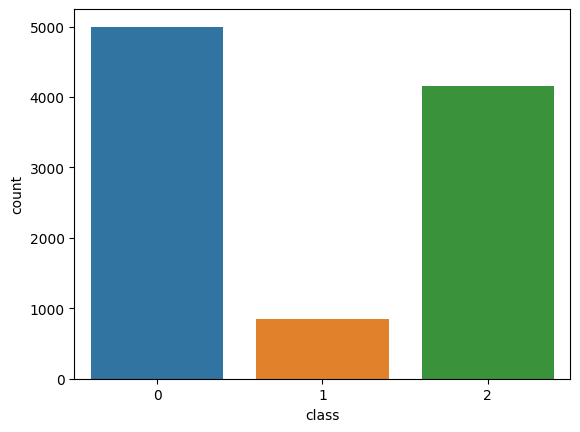

In [17]:
# Check the number of labels for each class of the dataset where 0 = Galaxy, 1 = Quasar, 2 = Star.

sns.countplot(x=stars_df['class'])
plt.show()

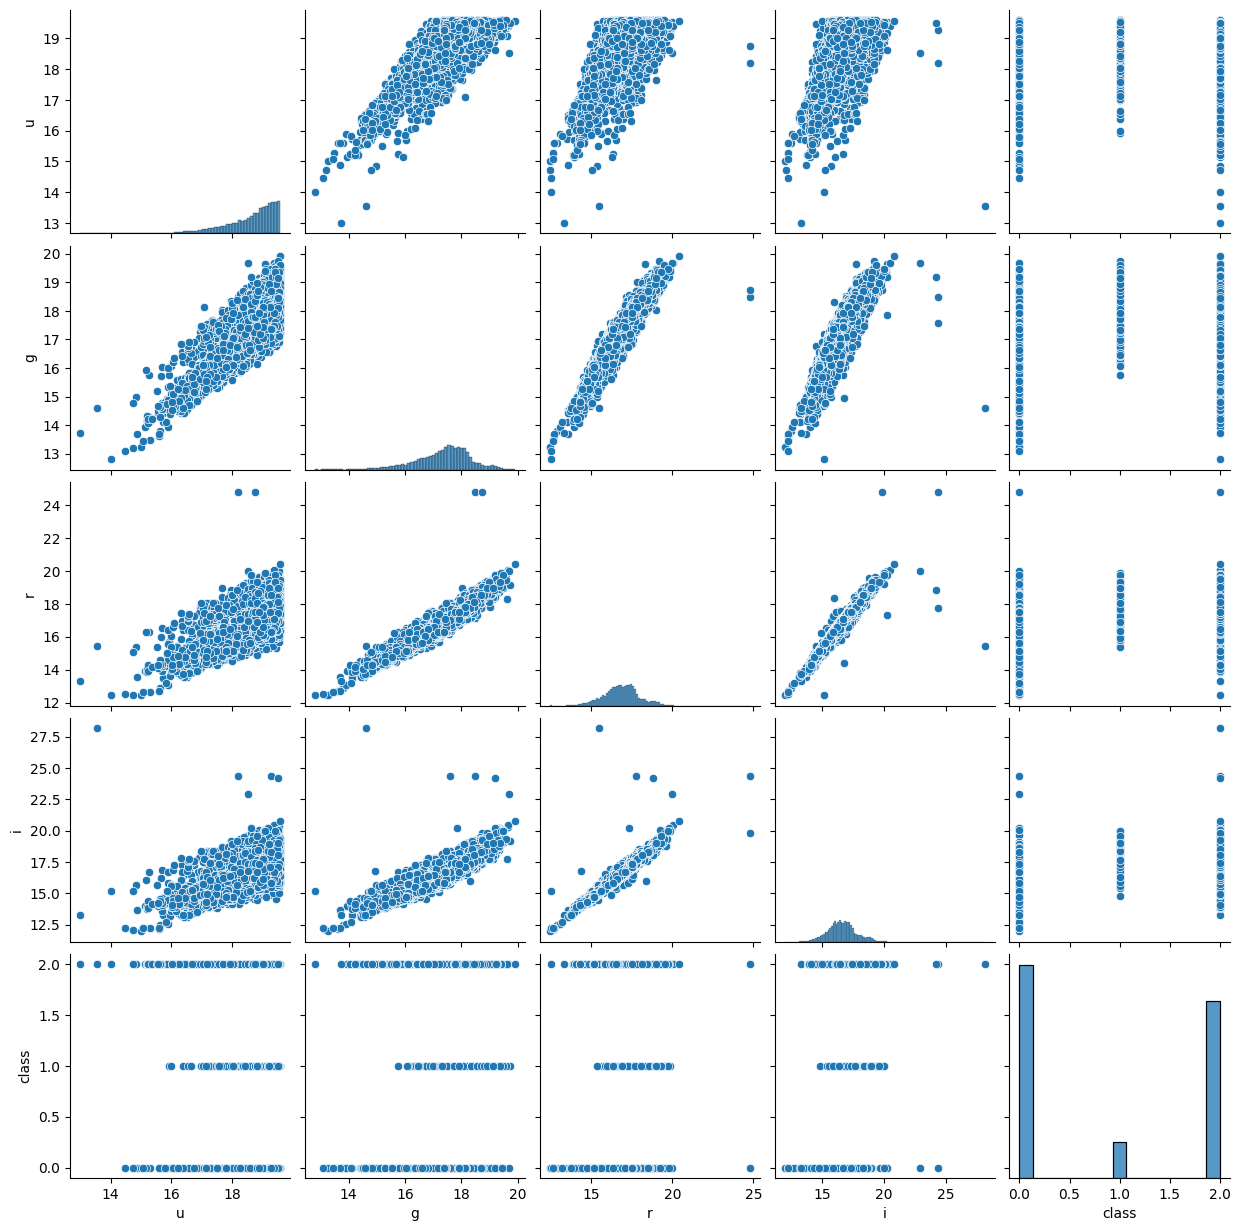

In [18]:
# Use pairplots to establish and understand interdependancy of train features
# "U" stands for ultraviolet. "G" stands for green. "R" stands for red. "I" stands for infrared.

sns.pairplot(stars_df[['u','g','r','i','class']])
plt.show()

## Machine Learning Models (Classification models)

### Decision Tree Classifier

In [19]:
# max_leaf_nodes is 15 since there are 15 columns
# max_depth is 3 since there are 3 types in 'class' (GALAXY, STAR, QSO)

dtClassifer = DecisionTreeClassifier(max_leaf_nodes=15,max_depth=3)

### Logistic Regression Classifier

In [20]:
LRClassifer = LogisticRegression()

### KNN classifier

In [21]:
# Nearest Neighbor Classifier
# n_neighbors is 3 since there are 3 types in 'class' (GALAXY, STAR, QSO)

NeNeClassifier = KNeighborsClassifier(n_neighbors=3)

In [22]:
# Fit the models to the dataset

dtClassifer.fit(X_train, y_train)

LRClassifer.fit(X_train, y_train)

NeNeClassifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
# Get the prediction set of the models

y_preds = dtClassifer.predict(X_test)
y_predsLR = LRClassifer.predict(X_test)
y_predsNeNe = NeNeClassifier.predict(X_test)

[Text(0.5, 0.875, 'X[11] <= -0.364\ngini = 0.574\nsamples = 2000\nvalue = [991, 178, 831]'),
 Text(0.25, 0.625, 'X[2] <= 1.174\ngini = 0.005\nsamples = 833\nvalue = [2, 0, 831]'),
 Text(0.125, 0.375, 'X[7] <= 1.562\ngini = 0.002\nsamples = 830\nvalue = [1, 0, 829]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 792\nvalue = [0, 0, 792]'),
 Text(0.1875, 0.125, 'gini = 0.051\nsamples = 38\nvalue = [1, 0, 37]'),
 Text(0.375, 0.375, 'X[7] <= 0.227\ngini = 0.444\nsamples = 3\nvalue = [1, 0, 2]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.75, 0.625, 'X[11] <= 0.182\ngini = 0.259\nsamples = 1167\nvalue = [989, 178, 0]'),
 Text(0.625, 0.375, 'X[3] <= 1.263\ngini = 0.018\nsamples = 996\nvalue = [987, 9, 0]'),
 Text(0.5625, 0.125, 'gini = 0.01\nsamples = 989\nvalue = [984, 5, 0]'),
 Text(0.6875, 0.125, 'gini = 0.49\nsamples = 7\nvalue = [3, 4, 0]'),
 Text(0.875, 0.375, 'X[2] <= 1.167\ngini = 0.02

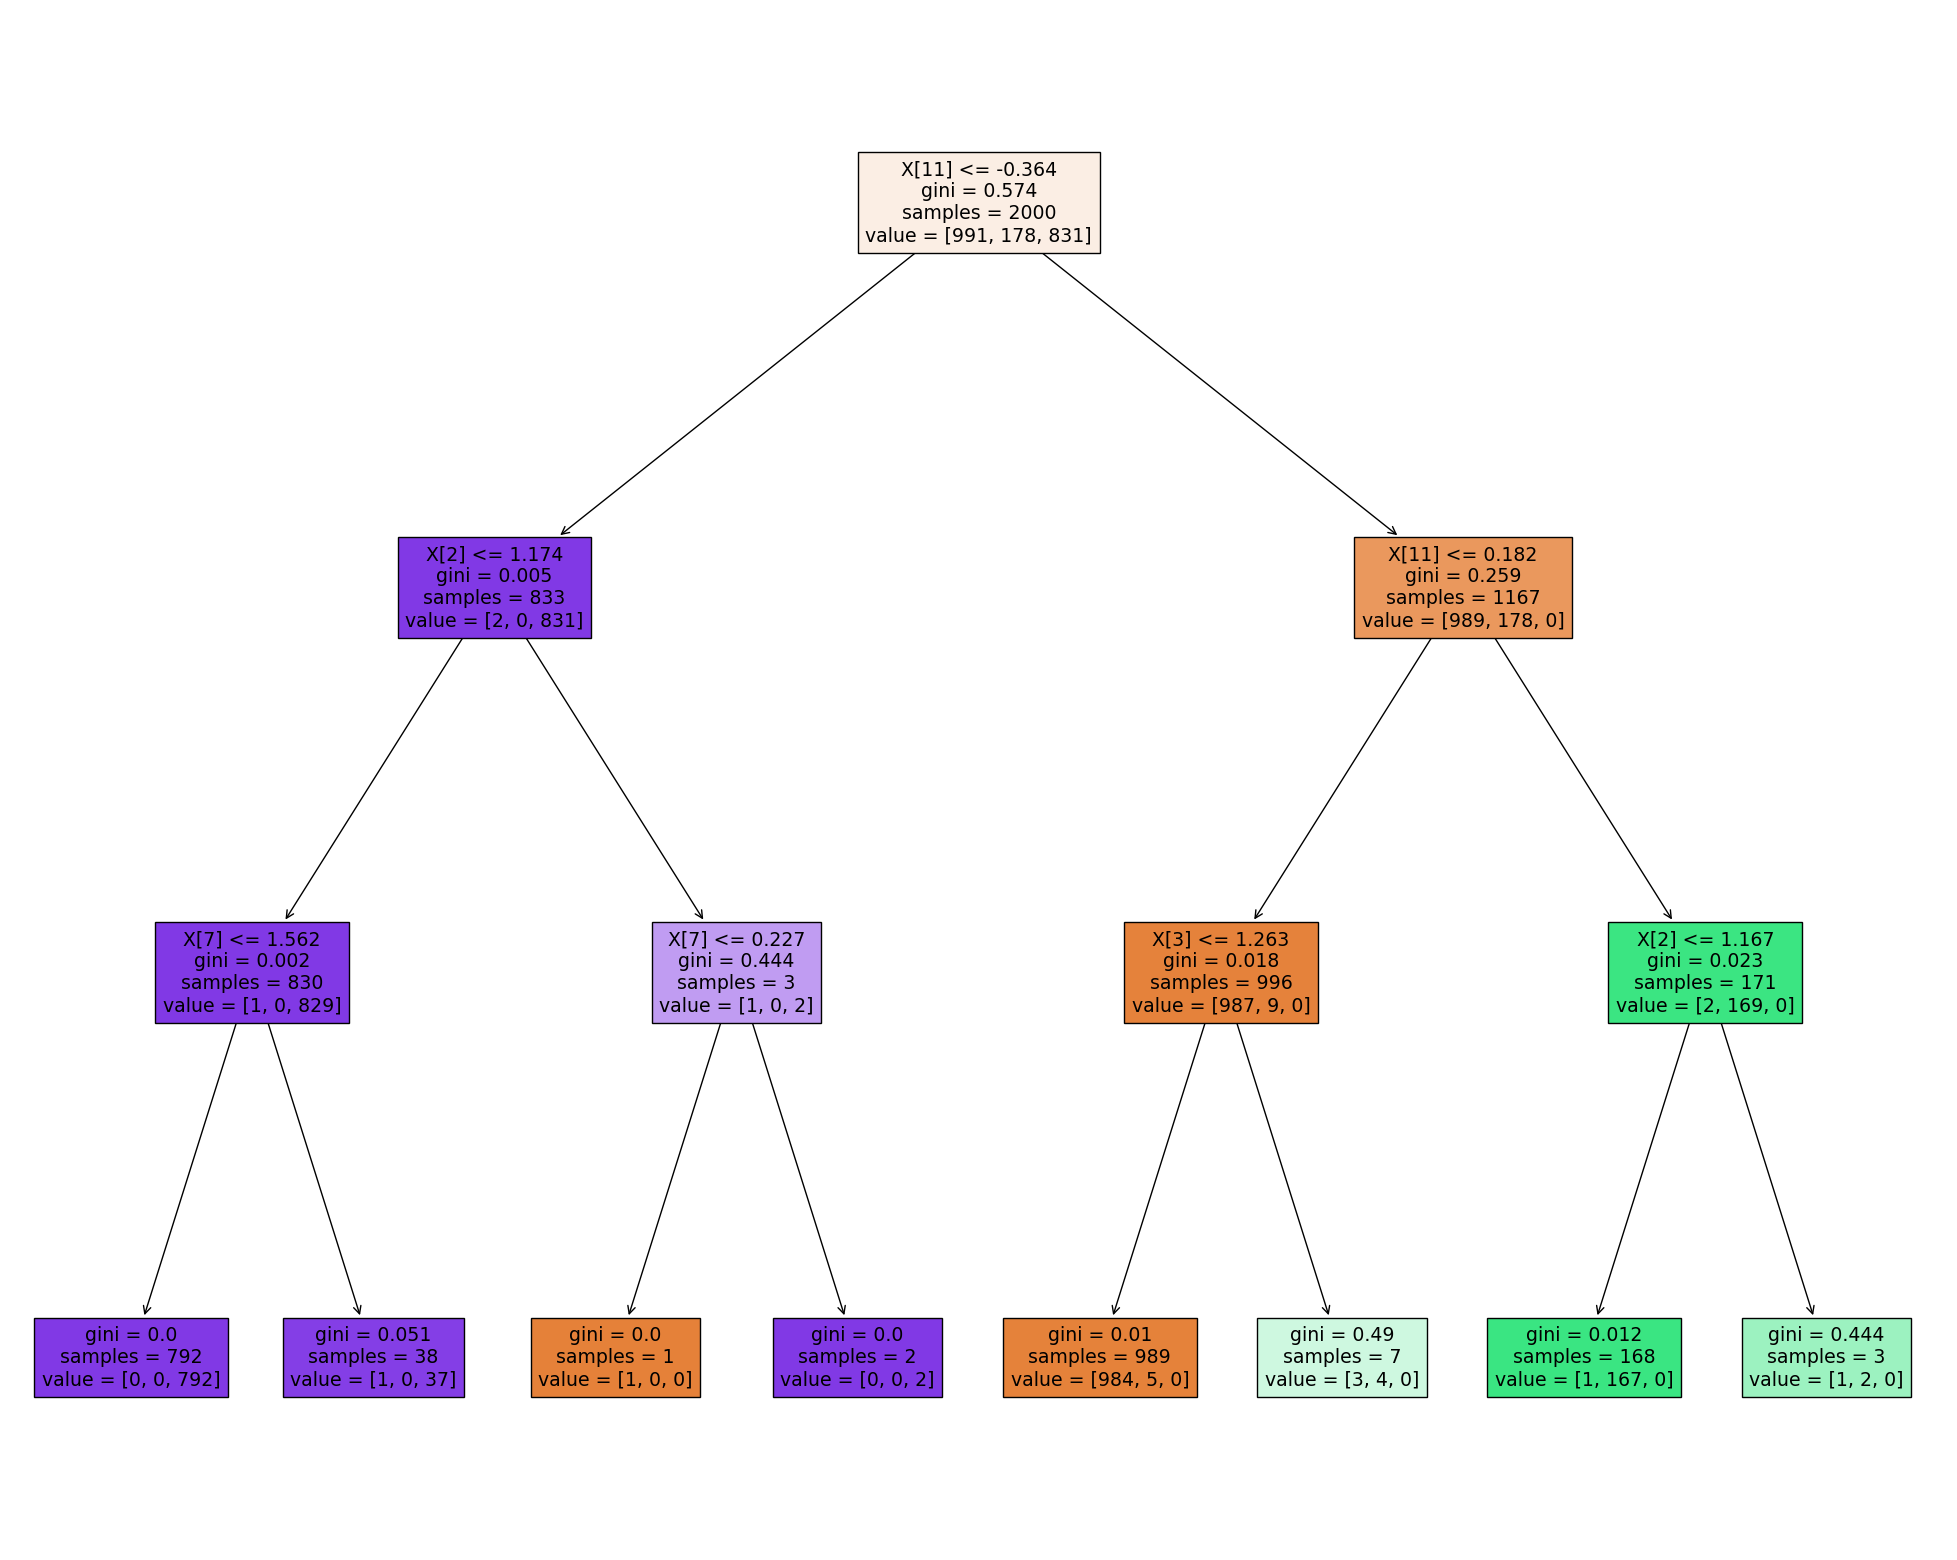

In [24]:
# Plot of Decision Tree

plt.figure(figsize=(25,20))
tree.plot_tree(dtClassifer.fit(X_train, y_train), filled=True)

In [25]:
# Display the last 10 predictions on the test split as output by all the models

print(y_preds[:10],'\n',y_test[:10])

print("\n*******************************************************")
print(y_predsLR[:10],'\n',y_test[:10])

print("\n*******************************************************")
print(y_predsNeNe[:10],'\n',y_test[:10])

[0 2 2 2 0 1 0 2 2 0] 
 9953    0
3850    2
4962    2
3886    2
5437    0
8517    1
2041    0
1989    2
1933    2
9984    0
Name: class, dtype: int32

*******************************************************
[0 2 2 2 0 1 0 2 2 0] 
 9953    0
3850    2
4962    2
3886    2
5437    0
8517    1
2041    0
1989    2
1933    2
9984    0
Name: class, dtype: int32

*******************************************************
[0 2 2 0 0 1 0 2 0 0] 
 9953    0
3850    2
4962    2
3886    2
5437    0
8517    1
2041    0
1989    2
1933    2
9984    0
Name: class, dtype: int32


## Classification Report

In [26]:
target_names = ['0', '1', '2']

print('\033[1m  Decision Tree -\n  \033[0m',classification_report(y_preds,y_test,target_names=target_names) + '\n')
print('\033[1m  Logistic Regression -\n  \033[0m',classification_report(y_predsLR,y_test,target_names=target_names) + '\n')
print("\033[1m  KNN Classifier -\n  \033[0m",classification_report(y_predsNeNe,y_test,target_names=target_names) + '\n')

  Decision Tree -
                 precision    recall  f1-score   support

           0       0.98      0.99      0.98      3979
           1       0.94      0.91      0.92       691
           2       1.00      0.99      0.99      3330

    accuracy                           0.98      8000
   macro avg       0.97      0.96      0.97      8000
weighted avg       0.98      0.98      0.98      8000


  Logistic Regression -
                 precision    recall  f1-score   support

           0       0.95      0.96      0.96      3976
           1       0.91      0.96      0.94       641
           2       0.97      0.95      0.96      3383

    accuracy                           0.96      8000
   macro avg       0.95      0.96      0.95      8000
weighted avg       0.96      0.96      0.96      8000


  KNN Classifier -
                 precision    recall  f1-score   support

           0       0.93      0.86      0.90      4357
           1       0.82      0.95      0.88       577
   